In [1]:
import gurobipy as gb
from gurobipy import *
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

# Rummikub

Rummikub is a game that combines elements of classic card games like Rummy with the strategy of tile placement. The game is played with a set of 106 tiles, with numbers ranging from 1 to 13 in four different colors (red, blue, yellow, and black). Additionally, there are two joker tiles in the set. The game is typically played by 2 to 4 players and revolves around the strategic placement and manipulation of numbered tiles. The objective of Rummikub is to be the first player to empty your rack of tiles by forming sets and runs of matching numbers. Sets consist of three or four tiles of the same number but different colors. For example, you could have a set of 3s with one red, one blue, and one black. Runs are sequences of at least three consecutive numbers of the same color. For instance, you could have a run of 4, 5, 6 in blue. The game continues until one player goes out, at which point they gain opponents' tile values, while others receive penalties determined by the remaining tiles in their racks.

In this project, our primary objective is to address Rummikub challenges through the application of integer linear programming. Initially, we plan to focus on a two-player scenario, with the potential to expand to a four-player format if time permits. Also, if time allows, our ultimate goal is to develop an interactive online Rummikub board game, providing users with a platform for engaging gameplay.

## Tiles Set up
$2*4*13 + joker*2$

### All tiles

In [2]:
Deck_types = ["Black", "Red", "Orange", "Blue"]
Deck_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Joker = "Joker"
Joker_values = 30

In [3]:
tiles_pool = [(color, value) for color in Deck_types for value in Deck_values]
tiles_pool.append((Joker, Joker_values))

In [4]:
len(tiles_pool)

53

In [5]:
tiles_pool

[('Black', 1),
 ('Black', 2),
 ('Black', 3),
 ('Black', 4),
 ('Black', 5),
 ('Black', 6),
 ('Black', 7),
 ('Black', 8),
 ('Black', 9),
 ('Black', 10),
 ('Black', 11),
 ('Black', 12),
 ('Black', 13),
 ('Red', 1),
 ('Red', 2),
 ('Red', 3),
 ('Red', 4),
 ('Red', 5),
 ('Red', 6),
 ('Red', 7),
 ('Red', 8),
 ('Red', 9),
 ('Red', 10),
 ('Red', 11),
 ('Red', 12),
 ('Red', 13),
 ('Orange', 1),
 ('Orange', 2),
 ('Orange', 3),
 ('Orange', 4),
 ('Orange', 5),
 ('Orange', 6),
 ('Orange', 7),
 ('Orange', 8),
 ('Orange', 9),
 ('Orange', 10),
 ('Orange', 11),
 ('Orange', 12),
 ('Orange', 13),
 ('Blue', 1),
 ('Blue', 2),
 ('Blue', 3),
 ('Blue', 4),
 ('Blue', 5),
 ('Blue', 6),
 ('Blue', 7),
 ('Blue', 8),
 ('Blue', 9),
 ('Blue', 10),
 ('Blue', 11),
 ('Blue', 12),
 ('Blue', 13),
 ('Joker', 30)]

### All Possible Sets

In [6]:
# Adjusting the setup to consider only the deck color
Deck_colors = ["Black", "Red", "Blue", "Orange"]

# Generating all possible sets with three consecutive numbers
# and represent each card in the set using Deck_color and Deck_values
three_consecutive_set_no_joker = []

for value in Deck_values[:-2]:  # Iterate through the values, stopping two before the end
    for color in Deck_colors:
        # Create a set of three consecutive cards of the same color
        consecutive_set = [(color, value), (color, value + 1), (color, value + 2)]
        three_consecutive_set_no_joker.append(consecutive_set)


In [7]:
# Adjusting the setup to include one Joker in each set
# The Joker can replace any one of the three cards in the set

three_consecutive_set_one_joker = []
# Iterate through each color and value, creating sets with one Joker
for color in Deck_colors:
    for value in Deck_values[:-2]:  # Iterate through the values, stopping two before the end
        # For each set of three consecutive values, create three sets, each with one Joker
        if value == 1:
            for i in range(3):
                consecutive_set_one_joker = [(color, value), (color, value + 1), (color, value + 2)]
                consecutive_set_one_joker[i] = "Joker"  # Replace one card with a Joker
                three_consecutive_set_one_joker.append(consecutive_set_one_joker)
        else:
            for i in range(2):
                consecutive_set_one_joker = [(color, value), (color, value + 1), (color, value + 2)]
                consecutive_set_one_joker[i] = "Joker"  # Replace one card with a Joker
                three_consecutive_set_one_joker.append(consecutive_set_one_joker)


In [8]:
# Adjusting the setup to include exactly two Jokers in each set
# Each set will now consist of one card from the deck and two Jokers

# Generating all possible sets with one card from the deck and two Jokers
three_consecutive_sets_with_two_jokers = []

for color in Deck_colors:
    for value in Deck_values:  # Iterate through all values
        # Create a set with one card from the deck and two Jokers
        set_with_two_jokers = [(color, value), "Joker", "Joker"]
        three_consecutive_sets_with_two_jokers.append(set_with_two_jokers)

In [9]:
# Generating sets with four consecutive numbers, same color, and without Joker

four_consecutive_sets_no_joker = []

for color in Deck_colors:
    for value in Deck_values[:-3]:  # Iterate through values, stopping three before the end
        # Create a set of four consecutive cards of the same color
        consecutive_set = [(color, value), (color, value + 1), (color, value + 2), (color, value + 3)]
        four_consecutive_sets_no_joker.append(consecutive_set)

In [10]:
four_consecutive_sets_one_joker = []

for color in Deck_colors:
    for value in Deck_values[:-3]:  # Iterate through values, stopping three before the end
        # Create a set of four consecutive cards of the same color
        if value == 1:
            for i in range(4):
                consecutive_set = [(color, value), (color, value + 1), (color, value + 2), (color, value + 3)]
                consecutive_set[i] = "Joker"
                four_consecutive_sets_one_joker.append(consecutive_set)
        else:
            for i in range(3):
                consecutive_set = [(color, value), (color, value + 1), (color, value + 2), (color, value + 3)]
                consecutive_set[i] = "Joker"
                four_consecutive_sets_one_joker.append(consecutive_set)

In [11]:
four_consecutive_sets_two_joker = []

for color in Deck_colors:
    for value in Deck_values[:-3]:  # Iterate through values, stopping three before the end
        # Create a set of four consecutive cards of the same color
        if value == 1:
            for i in range(3):
                for j in range(i+1, 4):
                    consecutive_set = [(color, value), (color, value + 1), (color, value + 2), (color, value + 3)]
                    consecutive_set[i] = "Joker"
                    consecutive_set[j] = "Joker"
                    four_consecutive_sets_two_joker.append(consecutive_set)
        else:
            for i in range(2):
                for j in range(i+1, 3):
                    consecutive_set = [(color, value), (color, value + 1), (color, value + 2), (color, value + 3)]
                    consecutive_set[i] = "Joker"
                    consecutive_set[j] = "Joker"
                    four_consecutive_sets_two_joker.append(consecutive_set)

In [12]:
# Generating sets with five consecutive numbers, same color, and without Joker

five_consecutive_sets_no_joker = []

for color in Deck_colors:
    for value in Deck_values[:-4]:  # Iterate through values, stopping four before the end
        # Create a set of five consecutive cards of the same color
        consecutive_set = [(color, value), (color, value + 1), (color, value + 2), (color, value + 3), (color, value + 4)]
        five_consecutive_sets_no_joker.append(consecutive_set)

In [13]:
# Generating sets with five consecutive numbers, same color, and 1 Joker

five_consecutive_sets_one_joker = []

for color in Deck_colors:
    for value in Deck_values[:-4]:  # Iterate through values, stopping four before the end
        # Create a set of five consecutive cards of the same color
        if value == 1:
            for i in range(5):
                consecutive_set = [(color, value), (color, value + 1), (color, value + 2), (color, value + 3), (color, value + 4)]
                consecutive_set[i] = "Joker"
                five_consecutive_sets_one_joker.append(consecutive_set)
        else:
            for i in range(4):
                consecutive_set = [(color, value), (color, value + 1), (color, value + 2), (color, value + 3), (color, value + 4)]
                consecutive_set[i] = "Joker"
                five_consecutive_sets_one_joker.append(consecutive_set)

In [14]:
# Generating sets with five consecutive numbers, same color, and 2 Joker

five_consecutive_sets_two_joker = []

for color in Deck_colors:
    for value in Deck_values[:-4]:  # Iterate through values, stopping four before the end
        # Create a set of five consecutive cards of the same color
        if value == 1:
            for i in range(4):
                for j in range(i+1, 5):
                    consecutive_set = [(color, value), (color, value + 1), (color, value + 2), (color, value + 3), (color, value + 4)]
                    consecutive_set[i] = "Joker"
                    consecutive_set[j] = "Joker"
                    five_consecutive_sets_two_joker.append(consecutive_set)
        else:
            for i in range(3):
                for j in range(i+1, 4):
                    consecutive_set = [(color, value), (color, value + 1), (color, value + 2), (color, value + 3), (color, value + 4)]
                    consecutive_set[i] = "Joker"
                    consecutive_set[j] = "Joker"
                    five_consecutive_sets_two_joker.append(consecutive_set)

In [15]:
# Generating sets of three cards, each from a different color, without Jokers, and all cards having the same value

three_cards_different_colors_same_value = []

for value in Deck_values:
    # Iterate through combinations of three different colors
    for i in range(len(Deck_colors)):
        for j in range(i + 1, len(Deck_colors)):
            for k in range(j + 1, len(Deck_colors)):
                # Create a set with one card from each of the three different colors, all with the same value
                set_of_three = [(Deck_colors[i], value), (Deck_colors[j], value), (Deck_colors[k], value)]
                three_cards_different_colors_same_value.append(set_of_three)

In [16]:
# Generating sets of three cards, each from a different color, 1 Jokers, and all cards having the same value

three_cards_different_colors_1_joker = []

for value in Deck_values:
    # Iterate through combinations of three different colors
    for i in range(len(Deck_colors)):
        for j in range(i + 1, len(Deck_colors)):
            # Create a set with one card from each of the three different colors, all with the same value
            set_of_three = [(Deck_colors[i], value), (Deck_colors[j], value), "Joker"]
            three_cards_different_colors_1_joker.append(set_of_three)

In [17]:
four_cards_different_colors_same_value = []

for value in Deck_values:
    # Iterate through combinations of three different colors
    set_of_four = [(Deck_colors[0], value), (Deck_colors[1], value), (Deck_colors[2], value), (Deck_colors[3], value)]
    four_cards_different_colors_same_value.append(set_of_four)

In [18]:
# Generating sets of four cards, each from a different color, 1 Jokers, and all cards having the same value

four_cards_different_colors_1_joker = []

for value in Deck_values:
    # Iterate through combinations of three different colors
    for i in range(len(Deck_colors)):
        for j in range(i + 1, len(Deck_colors)):
            for k in range(j + 1, len(Deck_colors)):
                # Create a set with one card from each of the three different colors, all with the same value
                set_of_four = [(Deck_colors[i], value), (Deck_colors[j], value), (Deck_colors[k], value), "Joker"]
                four_cards_different_colors_1_joker.append(set_of_four)

In [19]:
# Generating sets of four cards, each from a different color, 2 Jokers, and all cards having the same value

four_cards_different_colors_2_joker = []

for value in Deck_values:
    # Iterate through combinations of three different colors
    for i in range(len(Deck_colors)):
        for j in range(i + 1, len(Deck_colors)):
            # Create a set with one card from each of the three different colors, all with the same value
            set_of_four = [(Deck_colors[i], value), (Deck_colors[j], value), "Joker", "Joker"]
            four_cards_different_colors_2_joker.append(set_of_four)

In [20]:
three_consecutives = three_consecutive_set_no_joker + three_consecutive_set_one_joker + three_consecutive_sets_with_two_jokers
four_consecutives = four_consecutive_sets_no_joker + four_consecutive_sets_one_joker + four_consecutive_sets_two_joker
five_consecutives = five_consecutive_sets_no_joker + five_consecutive_sets_one_joker + five_consecutive_sets_two_joker
three_same = three_cards_different_colors_same_value + three_cards_different_colors_1_joker
four_same = four_cards_different_colors_same_value + four_cards_different_colors_1_joker + four_cards_different_colors_2_joker
all_sets = three_consecutives + four_consecutives + five_consecutives + three_same + four_same

In [21]:
all_sets = list(reversed(all_sets))

In [22]:
len(all_sets)

1173

In [23]:
# Total number of tiles
I = len(tiles_pool)
# Total number of sets
J = len(all_sets)

### The real game

In [24]:
# specify the tiles currently in rack and on table
Rack = [("Orange", 1), ("Orange", 3), ("Orange", 4), ("Orange", 8), 
        ("Blue", 2), ("Black", 2), ("Black", 10), ("Black", 13), ("Joker", 30)]

Set = [[("Black", 1), ("Black", 2), ("Black", 3), ("Black", 4)], 
       [("Black", 10), ("Black", 11), ("Black", 12)],
       [("Orange", 6), ("Orange", 7), ("Orange", 8)], 
       [("Orange", 9), ("Orange", 10), ("Orange", 11), ("Orange", 12), ("Orange", 13)], 
       [("Blue", 7), ("Blue", 8), ("Blue", 9)], 
       [("Blue", 10), ("Blue", 11), ("Blue", 12)], 
       [("Red", 11), ("Red", 12), ("Red", 13)]]

Table = [card for set_ in Set for card in set_]

In [25]:
played_tiles = Rack + Table

## Model 1: Maximum tiles played

In [26]:
model1 = gb.Model("Rummikub-M1")

Set parameter Username
Academic license - for non-commercial use only - expires 2024-08-30


## Decision variables

### Parameters

In [27]:
# whether a tile is in a particular formed set/run
S = model1.addVars(I, J, vtype = GRB.BINARY, 
                  name = ["tile " + str(tiles_pool[i]) + " is in set " + str(all_sets[j]) 
                          for i in range(I) for j in range(J)])

In [28]:
# number of tiles on the table, already played
T = model1.addVars(I, lb = 0, ub = 2, vtype = GRB.INTEGER, 
                  name = ["number of tile " + str(tiles_pool[i]) + " is on the table" for i in range(I)])

In [29]:
# how many times tiles is in the rack, on your hand not yet played
R = model1.addVars(I, lb = 0, ub = 2, vtype = GRB.INTEGER, 
                  name = ["number of tile " + str(tiles_pool[i]) + " is in the rack" for i in range(I)])

### Variables

In [30]:
# how many times/whether a set/run combination can be formed by the tiles on table and in rack
X = model1.addVars(J, lb = 0, ub = 2, vtype = GRB.INTEGER, 
                  name = ["set " + str(all_sets[j]) + " can be placed onto the table" for j in range(J)])

In [31]:
# how many times a tile can be played
Y = model1.addVars(I, lb = 0, ub = 2, vtype = GRB.INTEGER, 
                  name = ["tile " + str(tiles_pool[i]) + " can be placed from your rack onto the table" for i in range(I)])

## Objective function 1 - maximize played tiles

In [32]:
model1.setObjective(quicksum(Y[i] for i in range(I)), GRB.MAXIMIZE)

## Constraints

In [33]:
# The left-hand side adds up the number of tile i present in the sets that are finally on the table.
# The right-hand side denotes number of tile i that are already on the table plus that are placed from 
# the rack onto the table.
for i in range(I):
    sx_sum = quicksum(S[i, j] * X[j] for j in range(J))
    model1.addConstr(sx_sum == T[i] + Y[i])

In [34]:
# the number of times a tile can be played is less than the number of times the tile in the rack
for i in range(I):
    model1.addConstr(Y[i] <= R[i])

In [35]:
# frequency of each tiles appeared in rack and on table
Counter_all_played_tiles = {}
for tile in Rack:
    if tile not in Counter_all_played_tiles.keys():
        Counter_all_played_tiles[tile] = 1
    else:
        Counter_all_played_tiles[tile] += 1

for tile in Table:
    if tile not in Counter_all_played_tiles.keys():
        Counter_all_played_tiles[tile] = 1
    else:
        Counter_all_played_tiles[tile] += 1

In [36]:
Counter_all_played_tiles

{('Orange', 1): 1,
 ('Orange', 3): 1,
 ('Orange', 4): 1,
 ('Orange', 8): 2,
 ('Blue', 2): 1,
 ('Black', 2): 2,
 ('Black', 10): 2,
 ('Black', 13): 1,
 ('Joker', 30): 1,
 ('Black', 1): 1,
 ('Black', 3): 1,
 ('Black', 4): 1,
 ('Black', 11): 1,
 ('Black', 12): 1,
 ('Orange', 6): 1,
 ('Orange', 7): 1,
 ('Orange', 9): 1,
 ('Orange', 10): 1,
 ('Orange', 11): 1,
 ('Orange', 12): 1,
 ('Orange', 13): 1,
 ('Blue', 7): 1,
 ('Blue', 8): 1,
 ('Blue', 9): 1,
 ('Blue', 10): 1,
 ('Blue', 11): 1,
 ('Blue', 12): 1,
 ('Red', 11): 1,
 ('Red', 12): 1,
 ('Red', 13): 1}

In [37]:
# frequency of each tile appeared in rack
Counter_rack = {}
for tile in Rack:
    if tile not in Counter_rack.keys():
        Counter_rack[tile] = 1
    else:
        Counter_rack += 1

In [38]:
Counter_rack

{('Orange', 1): 1,
 ('Orange', 3): 1,
 ('Orange', 4): 1,
 ('Orange', 8): 1,
 ('Blue', 2): 1,
 ('Black', 2): 1,
 ('Black', 10): 1,
 ('Black', 13): 1,
 ('Joker', 30): 1}

In [39]:
# frequency of each tile appeared on table
Counter_table = {}
for tile in Table:
    if tile not in Counter_table.keys():
        Counter_table[tile] = 1
    else:
        Counter_table[tile] += 1

In [40]:
Counter_table

{('Black', 1): 1,
 ('Black', 2): 1,
 ('Black', 3): 1,
 ('Black', 4): 1,
 ('Black', 10): 1,
 ('Black', 11): 1,
 ('Black', 12): 1,
 ('Orange', 6): 1,
 ('Orange', 7): 1,
 ('Orange', 8): 1,
 ('Orange', 9): 1,
 ('Orange', 10): 1,
 ('Orange', 11): 1,
 ('Orange', 12): 1,
 ('Orange', 13): 1,
 ('Blue', 7): 1,
 ('Blue', 8): 1,
 ('Blue', 9): 1,
 ('Blue', 10): 1,
 ('Blue', 11): 1,
 ('Blue', 12): 1,
 ('Red', 11): 1,
 ('Red', 12): 1,
 ('Red', 13): 1}

In [41]:
# Rack
for tile in Rack:
    i = tiles_pool.index(tile)
    
    # update T[i]
    if tile in Counter_table.keys(): 
        num_table = Counter_table[tile]
        model1.addConstr(T[i] == num_table)
    else:
        model1.addConstr(T[i] == 0)
        
    # update R[i]
    num_rack = Counter_rack[tile]
    model1.addConstr(R[i] == num_rack)
    
    # update S[i, j]
    for set_ in all_sets:
        j = all_sets.index(set_)
        if tile not in set_:
            model1.addConstr(S[i, j] == 0)

In [42]:
# Table
for tile in Table:
    i = tiles_pool.index(tile)
    
    # update R[i]
    if tile in Counter_rack.keys(): 
        num_rack = Counter_rack[tile]
        model1.addConstr(R[i] == num_rack)
    else:
        model1.addConstr(R[i] == 0)
        
    # update T[i]
    num_table = Counter_table[tile]
    model1.addConstr(T[i] == num_table)
    
    # update S[i, j]
    for set_ in all_sets:
        j = all_sets.index(set_)
        if tile not in set_:
            model1.addConstr(S[i, j] == 0)

In [43]:
# Account for all sets containing Joker
num_joker = Counter_all_played_tiles[("Joker", 30)]
for set_ in all_sets:
        j = all_sets.index(set_)
        # if only have 1 Joker tile both on table and in rack, set S[i, j] = 0 for all j's with 2 Jokers
        if set_.count("Joker") == 2 and num_joker == 1:  
            for i in range(I):
                model1.addConstr(S[i, j] == 0)

In [44]:
# Account for all tiles not in rack or not on table
not_in_rack_table = []
for tile in tiles_pool:
    if tile not in Rack and tile not in Table:
        not_in_rack_table.append(tile)

In [45]:
for tile in not_in_rack_table:
    i = tiles_pool.index(tile)
    
    # update T[i] and R[i]
    model1.addConstr(T[i] == 0)
    model1.addConstr(R[i] == 0)
    
    # update X[i] and S[i, j]
    for set_ in all_sets:
        if tile in set_:
            j = all_sets.index(set_)
            model1.addConstr(X[j] == 0)
            model1.addConstr(S[i, j] == 0)

## Optimize

In [46]:
model1.optimize()
model1.status

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i9-9880H CPU @ 2.30GHz
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 66247 rows, 63501 columns and 66300 nonzeros
Model fingerprint: 0x385a65f9
Model has 53 quadratic constraints
Variable types: 0 continuous, 63501 integer (62169 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 2e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 66247 rows and 62766 columns
Presolve time: 0.07s
Presolved: 1658 rows, 1278 columns, 4352 nonzeros
Variable types: 0 continuous, 1278 integer (551 binary)
Found heuristic solution: objective 8.0000000

Explored 1 nodes (0 simplex iterations) in 0.09 seconds (0.07 work units)
Thread count was 16 (of 16 available processors)

Solution count 1: 8 

Optimal solution foun

2

In [47]:
model1.ObjVal

8.0

In [48]:
for j in range(J):
    if X[j].x != 0:
        print(X[j].varName, X[j].x)

set [('Black', 13), ('Red', 13), ('Orange', 13), 'Joker'] can be placed onto the table 1.0
set [('Red', 12), ('Blue', 12), ('Orange', 12), 'Joker'] can be placed onto the table 1.0
set [('Black', 12), ('Blue', 12), ('Orange', 12), 'Joker'] can be placed onto the table 1.0
set [('Black', 12), ('Red', 12), ('Orange', 12), 'Joker'] can be placed onto the table 1.0
set [('Black', 12), ('Red', 12), ('Blue', 12), 'Joker'] can be placed onto the table 1.0
set [('Red', 11), ('Blue', 11), ('Orange', 11), 'Joker'] can be placed onto the table 1.0
set [('Black', 11), ('Blue', 11), ('Orange', 11), 'Joker'] can be placed onto the table 1.0
set [('Black', 11), ('Red', 11), ('Orange', 11), 'Joker'] can be placed onto the table 1.0
set [('Black', 11), ('Red', 11), ('Blue', 11), 'Joker'] can be placed onto the table 1.0
set [('Black', 10), ('Blue', 10), ('Orange', 10), 'Joker'] can be placed onto the table 2.0
set [('Black', 12), ('Red', 12), ('Blue', 12), ('Orange', 12)] can be placed onto the table 1

In [49]:
for i in range(I):
     if Y[i].x != 0:
        print(Y[i].varName, Y[i].x)

tile ('Black', 2) can be placed from your rack onto the table 1.0
tile ('Black', 10) can be placed from your rack onto the table 1.0
tile ('Black', 13) can be placed from your rack onto the table 1.0
tile ('Orange', 1) can be placed from your rack onto the table 1.0
tile ('Orange', 3) can be placed from your rack onto the table 1.0
tile ('Orange', 4) can be placed from your rack onto the table 1.0
tile ('Orange', 8) can be placed from your rack onto the table 1.0
tile ('Blue', 2) can be placed from your rack onto the table 1.0


In [50]:
# for i in range(I):
#     for j in range(J):
#         if S[i,j].x == 1:
#             print(S[i,j].varName, S[i,j].x)

In [51]:
for i in range(I):
    for j in range(J):
        if S[i,j].x != 0 and X[j].x != 0:
            print(S[i,j].varName, S[i,j].x)
            #print(X[j].varName, X[j].x)

tile ('Black', 1) is in set [('Black', 1), ('Orange', 1), 'Joker'] 1.0
tile ('Black', 2) is in set [('Black', 1), ('Black', 2), ('Black', 3), ('Black', 4), 'Joker'] 1.0
tile ('Black', 3) is in set [('Black', 3), ('Orange', 3), 'Joker'] 1.0
tile ('Black', 4) is in set [('Black', 4), ('Orange', 4), 'Joker'] 1.0
tile ('Black', 10) is in set [('Black', 10), ('Blue', 10), ('Orange', 10), 'Joker'] 1.0
tile ('Black', 11) is in set [('Black', 11), ('Blue', 11), ('Orange', 11), 'Joker'] 1.0
tile ('Black', 12) is in set [('Black', 12), ('Blue', 12), ('Orange', 12), 'Joker'] 1.0
tile ('Black', 13) is in set [('Black', 13), ('Red', 13), ('Orange', 13), 'Joker'] 1.0
tile ('Red', 11) is in set [('Red', 11), ('Blue', 11), ('Orange', 11), 'Joker'] 1.0
tile ('Red', 12) is in set [('Red', 12), ('Blue', 12), ('Orange', 12), 'Joker'] 1.0
tile ('Red', 13) is in set [('Black', 13), ('Red', 13), ('Orange', 13), 'Joker'] 1.0
tile ('Orange', 1) is in set [('Orange', 1), 'Joker', ('Orange', 3), ('Orange', 4)] 1

## Model 2: Maximum total value of tiles played

In [52]:
model2 = gb.Model("Rummikub-M2")

## Decision Variable

In [53]:
# whether a tile is in a particular formed set/run
S = model2.addVars(I, J, vtype = GRB.BINARY, 
                  name = ["tile " + str(tiles_pool[i]) + " is in set " + str(all_sets[j]) 
                          for i in range(I) for j in range(J)])

# number of tiles on the table, already played
T = model2.addVars(I, lb = 0, ub = 2, vtype = GRB.INTEGER, 
                  name = ["number of tile " + str(tiles_pool[i]) + " is on the table" for i in range(I)])

# how many times tiles is in the rack, on your hand not yet played
R = model2.addVars(I, lb = 0, ub = 2, vtype = GRB.INTEGER, 
                  name = ["number of tile " + str(tiles_pool[i]) + " is in the rack" for i in range(I)])

# how many times/whether a set/run combination can be formed by the tiles on table and in rack
X = model2.addVars(J, lb = 0, ub = 2, vtype = GRB.INTEGER, 
                  name = ["set " + str(all_sets[j]) + " can be placed onto the table" for j in range(J)])

# how many times a tile can be played
Y = model2.addVars(I, lb = 0, ub = 2, vtype = GRB.INTEGER, 
                  name = ["tile " + str(tiles_pool[i]) + " can be placed from your rack onto the table" for i in range(I)])

## Objective Function

In [54]:
score = quicksum(Y[i] * tiles_pool[i][1] for i in range(I))
model2.setObjective(score, GRB.MAXIMIZE)

## Constraints

In [55]:
for i in range(I):
    sx_sum = quicksum(S[i, j] * X[j] for j in range(J))
    model2.addConstr(sx_sum == T[i] + Y[i])

In [56]:
# the number of times a tile can be played is less than the number of times the tile in the rack
for i in range(I):
    model2.addConstr(Y[i] <= R[i])

In [57]:
# frequency of each tiles appeared in rack and on table
Counter_all_played_tiles = {}
for tile in Rack:
    if tile not in Counter_all_played_tiles.keys():
        Counter_all_played_tiles[tile] = 1
    else:
        Counter_all_played_tiles[tile] += 1

for tile in Table:
    if tile not in Counter_all_played_tiles.keys():
        Counter_all_played_tiles[tile] = 1
    else:
        Counter_all_played_tiles[tile] += 1

In [58]:
# frequency of each tile appeared in rack
Counter_rack = {}
for tile in Rack:
    if tile not in Counter_rack.keys():
        Counter_rack[tile] = 1
    else:
        Counter_rack += 1

In [59]:
# frequency of each tile appeared on table
Counter_table = {}
for tile in Table:
    if tile not in Counter_table.keys():
        Counter_table[tile] = 1
    else:
        Counter_table[tile] += 1

In [60]:
# Rack
for tile in Rack:
    i = tiles_pool.index(tile)
    
    # update T[i]
    if tile in Counter_table.keys(): 
        num_table = Counter_table[tile]
        model2.addConstr(T[i] == num_table)
    else:
        model2.addConstr(T[i] == 0)
        
    # update R[i]
    num_rack = Counter_rack[tile]
    model2.addConstr(R[i] == num_rack)
    
    # update S[i, j]
    for set_ in all_sets:
        j = all_sets.index(set_)
        if tile not in set_:
            model2.addConstr(S[i, j] == 0)

In [61]:
# Table
for tile in Table:
    i = tiles_pool.index(tile)
    
    # update R[i]
    if tile in Counter_rack.keys(): 
        num_rack = Counter_rack[tile]
        model2.addConstr(R[i] == num_rack)
    else:
        model2.addConstr(R[i] == 0)
        
    # update T[i]
    num_table = Counter_table[tile]
    model2.addConstr(T[i] == num_table)
    
    # update S[i, j]
    for set_ in all_sets:
        j = all_sets.index(set_)
        if tile not in set_:
            model2.addConstr(S[i, j] == 0)

In [62]:
# Account for all sets containing Joker
num_joker = Counter_all_played_tiles[("Joker", 30)]
for set_ in all_sets:
        j = all_sets.index(set_)
        # if only have 1 Joker tile both on table and in rack, set S[i, j] = 0 for all j's with 2 Jokers
        if set_.count("Joker") == 2 and num_joker == 1:  
            for i in range(I):
                model2.addConstr(S[i, j] == 0)

In [63]:
# Account for all tiles not in rack or not on table
not_in_rack_table = []
for tile in tiles_pool:
    if tile not in Rack and tile not in Table:
        not_in_rack_table.append(tile)

In [64]:
for tile in not_in_rack_table:
    i = tiles_pool.index(tile)
    
    # update T[i] and R[i]
    model2.addConstr(T[i] == 0)
    model2.addConstr(R[i] == 0)
    
    # update X[i] and S[i, j]
    for set_ in all_sets:
        if tile in set_:
            j = all_sets.index(set_)
            model2.addConstr(X[j] == 0)
            model2.addConstr(S[i, j] == 0)

## Optimize

In [65]:
model2.optimize()
model2.status

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i9-9880H CPU @ 2.30GHz
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 66247 rows, 63501 columns and 66300 nonzeros
Model fingerprint: 0x32fef16b
Model has 53 quadratic constraints
Variable types: 0 continuous, 63501 integer (62169 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 3e+01]
  Bounds range     [1e+00, 2e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 66247 rows and 62766 columns
Presolve time: 0.07s
Presolved: 1658 rows, 1278 columns, 4352 nonzeros
Variable types: 0 continuous, 1278 integer (551 binary)
Found heuristic solution: objective 43.0000000

Explored 1 nodes (0 simplex iterations) in 0.09 seconds (0.07 work units)
Thread count was 16 (of 16 available processors)

Solution count 1: 43 

Optimal solution fo

2

In [66]:
model2.objVal

43.0

In [67]:
for j in range(J):
    if X[j].x != 0:
        print(X[j].varName, X[j].x)

set [('Black', 13), ('Red', 13), ('Orange', 13), 'Joker'] can be placed onto the table 1.0
set [('Red', 12), ('Blue', 12), ('Orange', 12), 'Joker'] can be placed onto the table 1.0
set [('Black', 12), ('Blue', 12), ('Orange', 12), 'Joker'] can be placed onto the table 1.0
set [('Black', 12), ('Red', 12), ('Orange', 12), 'Joker'] can be placed onto the table 1.0
set [('Black', 12), ('Red', 12), ('Blue', 12), 'Joker'] can be placed onto the table 1.0
set [('Red', 11), ('Blue', 11), ('Orange', 11), 'Joker'] can be placed onto the table 1.0
set [('Black', 11), ('Blue', 11), ('Orange', 11), 'Joker'] can be placed onto the table 1.0
set [('Black', 11), ('Red', 11), ('Orange', 11), 'Joker'] can be placed onto the table 1.0
set [('Black', 11), ('Red', 11), ('Blue', 11), 'Joker'] can be placed onto the table 1.0
set [('Black', 10), ('Blue', 10), ('Orange', 10), 'Joker'] can be placed onto the table 2.0
set [('Black', 12), ('Red', 12), ('Blue', 12), ('Orange', 12)] can be placed onto the table 1

In [68]:
for i in range(I):
    for j in range(J):
        if S[i,j].x != 0 and X[j].x != 0:
            print(S[i,j].varName, S[i,j].x)
            #print(X[j].varName, X[j].x)

tile ('Black', 1) is in set [('Black', 1), ('Orange', 1), 'Joker'] 1.0
tile ('Black', 2) is in set [('Black', 1), ('Black', 2), ('Black', 3), ('Black', 4), 'Joker'] 1.0
tile ('Black', 3) is in set [('Black', 3), ('Orange', 3), 'Joker'] 1.0
tile ('Black', 4) is in set [('Black', 4), ('Orange', 4), 'Joker'] 1.0
tile ('Black', 10) is in set [('Black', 10), ('Blue', 10), ('Orange', 10), 'Joker'] 1.0
tile ('Black', 11) is in set [('Black', 11), ('Blue', 11), ('Orange', 11), 'Joker'] 1.0
tile ('Black', 12) is in set [('Black', 12), ('Blue', 12), ('Orange', 12), 'Joker'] 1.0
tile ('Black', 13) is in set [('Black', 13), ('Red', 13), ('Orange', 13), 'Joker'] 1.0
tile ('Red', 11) is in set [('Red', 11), ('Blue', 11), ('Orange', 11), 'Joker'] 1.0
tile ('Red', 12) is in set [('Red', 12), ('Blue', 12), ('Orange', 12), 'Joker'] 1.0
tile ('Red', 13) is in set [('Black', 13), ('Red', 13), ('Orange', 13), 'Joker'] 1.0
tile ('Orange', 1) is in set [('Orange', 1), 'Joker', ('Orange', 3), ('Orange', 4)] 1

# Gaming time!

In [35]:
def max_num_tiles(Rack, Table, Counter_all_played_tiles, Counter_rack, 
                  Counter_table, tiles_pool = tiles_pool, all_sets = all_sets):
    model1 = gb.Model("Rummikub-M1")
    
    # whether a tile is in a particular formed set/run
    S = model1.addVars(I, J, vtype = GRB.BINARY, 
                      name = ["tile " + str(tiles_pool[i]) + " is in set " + str(all_sets[j]) 
                              for i in range(I) for j in range(J)])
    # number of tiles on the table, already played
    T = model1.addVars(I, lb = 0, ub = 2, vtype = GRB.INTEGER, 
                      name = ["number of tile " + str(tiles_pool[i]) + " is on the table" for i in range(I)])
    
    # how many times tiles is in the rack, on your hand not yet played
    R = model1.addVars(I, lb = 0, ub = 2, vtype = GRB.INTEGER, 
                      name = ["number of tile " + str(tiles_pool[i]) + " is in the rack" for i in range(I)])
    
    # how many times/whether a set/run combination can be formed by the tiles on table and in rack
    X = model1.addVars(J, lb = 0, ub = 2, vtype = GRB.INTEGER, 
                      name = ["set " + str(all_sets[j]) + " can be placed onto the table" for j in range(J)])
    
    # how many times a tile can be played
    Y = model1.addVars(I, lb = 0, ub = 2, vtype = GRB.INTEGER, 
                      name = ["tile " + str(tiles_pool[i]) + " can be placed from your rack onto the table" for i in range(I)])
    
    model1.setObjective(quicksum(Y[i] for i in range(I)), GRB.MAXIMIZE)
    
    # The left-hand side adds up the number of tile i present in the sets that are finally on the table.
    # The right-hand side denotes number of tile i that are already on the table plus that are placed from 
    # the rack onto the table.
    for i in range(I):
        sx_sum = quicksum(S[i, j] * X[j] for j in range(J))
        model1.addConstr(sx_sum == T[i] + Y[i])
        
    # the number of times a tile can be played is less than the number of times the tile in the rack
    for i in range(I):
        model1.addConstr(Y[i] <= R[i])
        
    # Rack
    for tile in Rack:
        i = tiles_pool.index(tile)

        # update T[i]
        if tile in Counter_table.keys(): 
            num_table = Counter_table[tile]
            model1.addConstr(T[i] == num_table)
        else:
            model1.addConstr(T[i] == 0)

        # update R[i]
        num_rack = Counter_rack[tile]
        model1.addConstr(R[i] == num_rack)

        # update S[i, j]
        for set_ in all_sets:
            j = all_sets.index(set_)
            if tile not in set_:
                model1.addConstr(S[i, j] == 0)
                
    # Table
    for tile in Table:
        i = tiles_pool.index(tile)

        # update R[i]
        if tile in Counter_rack.keys(): 
            num_rack = Counter_rack[tile]
            model1.addConstr(R[i] == num_rack)
        else:
            model1.addConstr(R[i] == 0)

        # update T[i]
        num_table = Counter_table[tile]
        model1.addConstr(T[i] == num_table)

        # update S[i, j]
        for set_ in all_sets:
            j = all_sets.index(set_)
            if tile not in set_:
                model1.addConstr(S[i, j] == 0)
                
    # Account for all sets containing Joker
    if ("Joker", 30) in Counter_all_played_tiles.keys():
        num_joker = Counter_all_played_tiles[("Joker", 30)]
        for set_ in all_sets:
                j = all_sets.index(set_)
                # if only have 1 Joker tile both on table and in rack, set S[i, j] = 0 for all j's with 2 Jokers
                if set_.count("Joker") == 2 and num_joker == 1:  
                    for i in range(I):
                        model1.addConstr(S[i, j] == 0)
                    
    # Account for all tiles not in rack or not on table
    not_in_rack_table = []
    for tile in tiles_pool:
        if tile not in Rack and tile not in Table:
            not_in_rack_table.append(tile)
            
    for tile in not_in_rack_table:
        i = tiles_pool.index(tile)

        # update T[i] and R[i]
        model1.addConstr(T[i] == 0)
        model1.addConstr(R[i] == 0)

        # update X[i] and S[i, j]
        for set_ in all_sets:
            if tile in set_:
                j = all_sets.index(set_)
                model1.addConstr(X[j] == 0)
                model1.addConstr(S[i, j] == 0)
        
        
    model1.optimize()
    model1.status
        
    return model1

In [36]:
def max_value_tiles(Rack, Table, Counter_all_played_tiles, Counter_rack, 
                    Counter_table, tiles_pool = tiles_pool, all_sets = all_sets):
    model2 = gb.Model("Rummikub-M2")
    
    # whether a tile is in a particular formed set/run
    S = model2.addVars(I, J, vtype = GRB.BINARY, 
                      name = ["tile " + str(tiles_pool[i]) + " is in set " + str(all_sets[j]) 
                              for i in range(I) for j in range(J)])

    # number of tiles on the table, already played
    T = model2.addVars(I, lb = 0, ub = 2, vtype = GRB.INTEGER, 
                      name = ["number of tile " + str(tiles_pool[i]) + " is on the table" for i in range(I)])

    # how many times tiles is in the rack, on your hand not yet played
    R = model2.addVars(I, lb = 0, ub = 2, vtype = GRB.INTEGER, 
                      name = ["number of tile " + str(tiles_pool[i]) + " is in the rack" for i in range(I)])

    # how many times/whether a set/run combination can be formed by the tiles on table and in rack
    X = model2.addVars(J, lb = 0, ub = 2, vtype = GRB.INTEGER, 
                      name = ["set " + str(all_sets[j]) + " can be placed onto the table" for j in range(J)])

    # how many times a tile can be played
    Y = model2.addVars(I, lb = 0, ub = 2, vtype = GRB.INTEGER, 
                      name = ["tile " + str(tiles_pool[i]) + " can be placed from your rack onto the table" for i in range(I)])
    
    score = quicksum(Y[i] * tiles_pool[i][1] for i in range(I))
    model2.setObjective(score, GRB.MAXIMIZE)
    
    for i in range(I):
        sx_sum = quicksum(S[i, j] * X[j] for j in range(J))
        model2.addConstr(sx_sum == T[i] + Y[i])
        
    # the number of times a tile can be played is less than the number of times the tile in the rack
    for i in range(I):
        model2.addConstr(Y[i] <= R[i])
        
    # Rack
    for tile in Rack:
        i = tiles_pool.index(tile)

        # update T[i]
        if tile in Counter_table.keys(): 
            num_table = Counter_table[tile]
            model2.addConstr(T[i] == num_table)
        else:
            model2.addConstr(T[i] == 0)

        # update R[i]
        num_rack = Counter_rack[tile]
        model2.addConstr(R[i] == num_rack)

        # update S[i, j]
        for set_ in all_sets:
            j = all_sets.index(set_)
            if tile not in set_:
                model2.addConstr(S[i, j] == 0)
                
    
    # Table
    for tile in Table:
        i = tiles_pool.index(tile)

        # update R[i]
        if tile in Counter_rack.keys(): 
            num_rack = Counter_rack[tile]
            model2.addConstr(R[i] == num_rack)
        else:
            model2.addConstr(R[i] == 0)

        # update T[i]
        num_table = Counter_table[tile]
        model2.addConstr(T[i] == num_table)

        # update S[i, j]
        for set_ in all_sets:
            j = all_sets.index(set_)
            if tile not in set_:
                model2.addConstr(S[i, j] == 0)
                
    # Account for all sets containing Joker
    if ("Joker", 30) in Counter_all_played_tiles.keys():
        num_joker = Counter_all_played_tiles[("Joker", 30)]
        for set_ in all_sets:
                j = all_sets.index(set_)
                # if only have 1 Joker tile both on table and in rack, set S[i, j] = 0 for all j's with 2 Jokers
                if set_.count("Joker") == 2 and num_joker == 1:  
                    for i in range(I):
                        model2.addConstr(S[i, j] == 0)
                    
    # Account for all tiles not in rack or not on table
    not_in_rack_table = []
    for tile in tiles_pool:
        if tile not in Rack and tile not in Table:
            not_in_rack_table.append(tile)
            
    for tile in not_in_rack_table:
        i = tiles_pool.index(tile)

        # update T[i] and R[i]
        model2.addConstr(T[i] == 0)
        model2.addConstr(R[i] == 0)

        # update X[i] and S[i, j]
        for set_ in all_sets:
            if tile in set_:
                j = all_sets.index(set_)
                model2.addConstr(X[j] == 0)
                model2.addConstr(S[i, j] == 0)
    
    model2.optimize()
    model2.status
        
    return model2

In [37]:
def get_counter_all_played_tiles(Rack, Table):
    Counter_all_played_tiles = {}
    for tile in Rack:
        if tile not in Counter_all_played_tiles.keys():
            Counter_all_played_tiles[tile] = 1
        else:
            Counter_all_played_tiles[tile] += 1

    for tile in Table:
        if tile not in Counter_all_played_tiles.keys():
            Counter_all_played_tiles[tile] = 1
        else:
            Counter_all_played_tiles[tile] += 1
            
    return Counter_all_played_tiles

In [38]:
def get_counter_rack(Rack):
    Counter_rack = {}
    for tile in Rack:
        if tile not in Counter_rack.keys():
            Counter_rack[tile] = 1
        else:
            Counter_rack[tile] += 1
            
    return Counter_rack

In [39]:
def get_counter_table(Table):
    Counter_table = {}
    for tile in Table:
        if tile not in Counter_table.keys():
            Counter_table[tile] = 1
        else:
            Counter_table[tile] += 1 
    return Counter_table

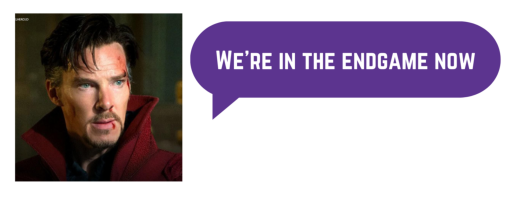

Welcome to Rummikub Endgame 😈!
🌟 Hello, Rummikub enthusiasts! Ready to up your game? 🌟
🔍 Dive into a world where strategy meets fun. Our solver is here to guide you through the twists and turns of Rummikub, making each move smarter and every game more enjoyable. 
🧩 Whether you're a seasoned pro or just starting out, Rummikub Endgame is your go-to companion for mastering the tiles. Let's create those perfect combinations together!
🎉 Get ready to challenge your skills and have a blast. Start your Rummikub journey with us today! 🎉
Happy gaming!


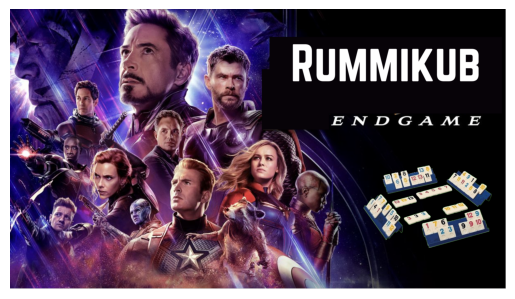

To to start your game, please tell me what tiles do you currently have in your rack.
What is the tile's color? If you finish setting up the rack, enter "quit"
1. Orange🧡 2. Black🖤 3. Blue💙 4. Red❤️ 5. Joker🤡
2
What is the tile's value? Note that Joker is valued at 30.
1
What is the tile's color? If you finish setting up the rack, enter "quit"
1. Orange🧡 2. Black🖤 3. Blue💙 4. Red❤️ 5. Joker🤡
3
What is the tile's value? Note that Joker is valued at 30.
1
What is the tile's color? If you finish setting up the rack, enter "quit"
1. Orange🧡 2. Black🖤 3. Blue💙 4. Red❤️ 5. Joker🤡
quit

Great! I got your rack. Now, please tell me what tiles do you currently have on the table.

What is the tile's color? If you finish setting up the table, enter "quit"
1. Orange🧡 2. Black🖤 3. Blue💙 4. Red❤️ 5. Joker🤡
1
What is the tile's value? Note that Joker is valued at 30.
1
What is the tile's color? If you finish setting up the table, enter "quit"
1. Orange🧡 2. Black🖤 3. Blue💙 4. Red❤️ 5. Joker🤡
quit

Fatas

GurobiError: Model too large for size-limited license; visit https://www.gurobi.com/free-trial for a full license

In [40]:
image1 = mpimg.imread("intro.png")
plt.axis('off')
plt.imshow(image1)
plt.show()
greeting_msg = "Welcome to Rummikub Endgame 😈!\n" \
            + "🌟 Hello, Rummikub enthusiasts! Ready to up your game? 🌟\n" \
            + "🔍 Dive into a world where strategy meets fun. Our solver is here to guide you through the twists and turns of Rummikub, making each move smarter and every game more enjoyable. \n" \
            + "🧩 Whether you're a seasoned pro or just starting out, Rummikub Endgame is your go-to companion for mastering the tiles. Let's create those perfect combinations together!\n" \
            + "🎉 Get ready to challenge your skills and have a blast. Start your Rummikub journey with us today! 🎉\n"\
            + "Happy gaming!"
print(greeting_msg)

image2 = mpimg.imread("rummikub_logo.png")
plt.axis('off')
plt.imshow(image2)
plt.show()

print("To to start your game, please tell me what tiles do you currently have in your rack.")
Rack = []
Color = ["Orange", "Black", "Blue", "Red", "Joker"]

while True:
    print("What is the tile's color? If you finish setting up the rack, enter \"quit\"")
    response1 = input("1. Orange🧡 2. Black🖤 3. Blue💙 4. Red❤️ 5. Joker🤡\n")
    if response1 == "quit":
        break
    else:
        color_ind = int(response1) -1
        color = Color[color_ind]
        response2 = input("What is the tile's value? Note that Joker is valued at 30.\n")
        value = int(response2)
        
        Rack.append((color, value))
        
print("\nGreat! I got your rack. Now, please tell me what tiles do you currently have on the table.\n")
Table = []
while True:
    print("What is the tile's color? If you finish setting up the table, enter \"quit\"")
    response1 = input("1. Orange🧡 2. Black🖤 3. Blue💙 4. Red❤️ 5. Joker🤡\n")
    if response1 == "quit":
        break
    else:
        color_ind = int(response1) -1
        color = Color[color_ind]
        response2 = input("What is the tile's value? Note that Joker is valued at 30.\n")
        value = int(response2)
        
        Table.append((color, value))
        
print("\nFatasitic! Now check your Rack and Table again.")
print("Your rack is", Rack)
print("Your table is", Table)
print("\n\nAlright, ready to rock with Rummikub 😈?\n")
print("🔥🔥🔥 Let's goooooooo 🔥🔥🔥\n\n")

print("We've got you two options:")
print("1. Maximize the number of the played tiles that could be placed from your rack onto the table.")
print("2. Maximize the total value of the played tiles that could be placed from your rack onto the table.")
obj_choice = input("Your choice would be?\n")


# frequency of each tiles appeared in rack and on table
Counter_all_played_tiles = get_counter_all_played_tiles(Rack, Table)  

# frequency of each tile appeared in rack
Counter_rack = get_counter_rack(Rack)

# frequency of each tile appeared on table
Counter_table = get_counter_table(Table)

        
if obj_choice == "1":
    print("Great choice! We'll maximize the number of the played tiles that could be placed from your rack onto the table.")
    print("\n\nPlease wait for a second, we'll get you all the possible moves...\n\n")
    
    model1 = max_num_tiles(Rack, Table, Counter_all_played_tiles, Counter_rack, Counter_table)
   
    print(model1.ObjVal)

elif obj_choice == "2":
    print("Great choice! We'll maximize the total value of the played tiles that could be placed from your rack onto the table.")
    print("\n\nPlease wait for a second, we'll get you all the possible moves...\n\n")
    
    model2 = max_value_tiles(Rack, Table, Counter_all_played_tiles, Counter_rack, Counter_table)
    print(model2.ObjVal)